<a href="https://colab.research.google.com/github/ayushksingh28/EvalmeTr/blob/main/EvalMeTr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [49]:
df = pd.read_csv('/content/drive/MyDrive/telcochurn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [50]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [51]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [52]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [53]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [54]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [55]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [56]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [57]:
churn_decision = (y_pred_small >= 0.5)

Accuracy and Dummy Model

In [58]:
len(y_val)

1860

In [59]:
(y_val == churn_decision).sum()

1427

In [60]:
(1427 / 1860)*100

76.72043010752688

In [61]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [62]:
score = []

for t in thresholds:
  churn_decision = (y_pred >= t)
  scores = (y_val == churn_decision).mean()
  print("%.2f %.3f" % (t, scores))
  score.append(scores)

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


In [63]:
score

[0.26129032258064516,
 0.5010752688172043,
 0.5946236559139785,
 0.6403225806451613,
 0.6897849462365592,
 0.7295698924731183,
 0.7548387096774194,
 0.7672043010752688,
 0.7817204301075269,
 0.7951612903225806,
 0.8016129032258065,
 0.7903225806451613,
 0.7897849462365591,
 0.7881720430107527,
 0.7736559139784946,
 0.7521505376344086,
 0.7419354838709677,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549]

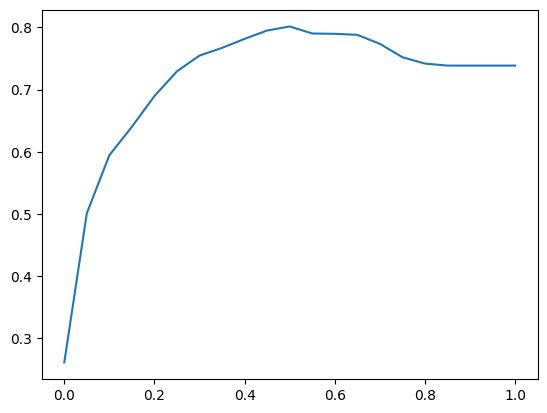

In [64]:
plt.plot(thresholds, score)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_val, churn_decision)

0.7387096774193549

In [67]:
score = []

for t in thresholds:
  scores = accuracy_score(y_val, y_pred >= t)
  print("%.2f %.3f" % (t, scores))
  score.append(scores)

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


In [68]:
from collections import Counter

In [69]:
Counter(y_pred >= 1.0)

Counter({False: 1860})

Our model gives an accuracy of 80% and on the other hand the dummy model gives an accuracy of 74% for all customers churning (y_pred >= 1.0).

> Why do we bother for an improvement of only 6% ?

As there are more number of non-churning people than the churning ones. There is a class imbalance in the data and as the model correctly predicts the most people won't churn hence the increased accuracy.

In [70]:
Counter(y_val)

Counter({0: 1374, 1: 486})

Confusion Table

1. Different type of errors and correct decisions
2. Arranging them in a table

In [71]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [72]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [73]:
predict_positive & actual_positive

array([False, False, False, ..., False, False, False])

In [74]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [75]:
confusion_matrix  = np.array([
    [tn, fp],
    [fn, tp]
])

In [76]:
confusion_matrix

array([[1202,  172],
       [ 197,  289]])

Precision and Recall

1. Precision is the fraction of positive predictions that are correct.
2. Recall is the fraction of correctly indentified positive examples.

In [77]:
p = tp / (tp + fp)
p

0.6268980477223427

In [78]:
r = tp / (tp + fn)
r

0.5946502057613169

ROC Curves: ROC is Receiver Operating Characteristics, basically used to describe the performance of a model.

(The concept came into existence and use during World War II to compute the accuracy of radars)

TPR and FPR are True Positive Rate and False Positive Rate respectively.

In [79]:
## FPR  = FP / (TN + FP)
## TPR = TP / (FN + TP)

In [80]:
tpr = tp / (fn + tp)
tpr

0.5946502057613169

In [81]:
fpr = fp / (tn + fp)
fpr

0.12518195050946143

In [82]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [83]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,486,1374,0,0
1,0.01,483,1190,3,184
2,0.02,481,1074,5,300
3,0.03,478,1011,8,363
4,0.04,478,970,8,404
...,...,...,...,...,...
96,0.96,0,0,486,1374
97,0.97,0,0,486,1374
98,0.98,0,0,486,1374
99,0.99,0,0,486,1374


In [84]:
df_scores[:: 10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [85]:
df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [86]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,483,1190,3,184,0.993827,0.866084
2,0.02,481,1074,5,300,0.989712,0.781659
3,0.03,478,1011,8,363,0.983539,0.735808
4,0.04,478,970,8,404,0.983539,0.705968
...,...,...,...,...,...,...,...
96,0.96,0,0,486,1374,0.000000,0.000000
97,0.97,0,0,486,1374,0.000000,0.000000
98,0.98,0,0,486,1374,0.000000,0.000000
99,0.99,0,0,486,1374,0.000000,0.000000


In [87]:
df_scores[:: 10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


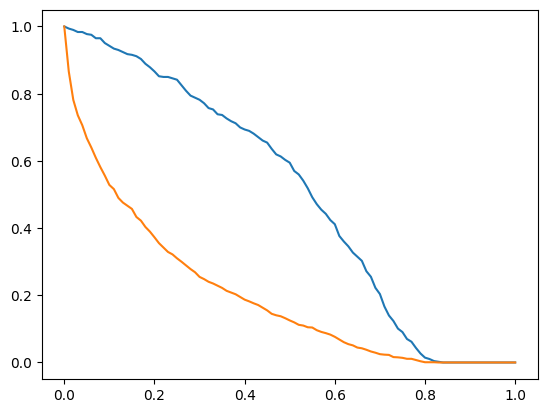

In [88]:
plt.plot(df_scores.threshold, df_scores["tpr"], label = "TPR")
plt.plot(df_scores.threshold, df_scores["fpr"], label = "FPR")

Random Model

In [89]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))

In [90]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.148, 0.923, 0.044])

ROC AUC Curves

1. Area under the curve, which is a useful metric for evaluating a binary classification models.
2. Interpretation in AUC

In [91]:
from sklearn.metrics import auc

In [99]:
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363366398907399

AUC is the probability that a randomly selected positive example is higher than a randomly selected negative example.

In [104]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [105]:
import random

In [106]:
n = 100000
success = 0
for i in range(n):
  pos_ind = random.randint(0, len(pos) - 1)
  neg_ind = random.randint(0, len(neg) - 1)

  if pos[pos_ind] > neg[neg_ind]:
    success += 1

success / n

0.83696

In [108]:
#Using Numpy
n = 100000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.83827